In [26]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [33]:
df = pd.read_csv('EDA_final.csv')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PoolQC
0,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,West,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,0,2,2008,WD,Normal,208500,0
1,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Center,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,0,5,2007,WD,Normal,181500,0
2,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,West,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,0,9,2008,WD,Normal,223500,0
3,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Center,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,0,2,2006,WD,Abnorml,140000,0
4,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,North,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,0,12,2008,WD,Normal,250000,0


In [34]:
df['PricePerFoot'] = df.SalePrice/df.LotArea
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PoolQC,PricePerFoot
0,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,West,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,0,2,2008,WD,Normal,208500,0,24.674556
1,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Center,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,0,5,2007,WD,Normal,181500,0,18.906250
2,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,West,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,0,9,2008,WD,Normal,223500,0,19.866667
3,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Center,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,0,2,2006,WD,Abnorml,140000,0,14.659686
4,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,North,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,0,12,2008,WD,Normal,250000,0,17.531557


In [35]:

'''
North has slightly higher price per foot.

'''

df.groupby('Neighborhood')['PricePerFoot'].agg(['mean'])

,mean
Neighborhood,
Center,18.297826
East,16.479890
North,24.460078
South,21.879734
West,18.489689


Text(0, 0.5, 'Sale Price')

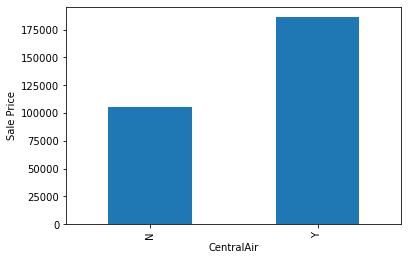

In [55]:
'''
Houses with central air sell higher

'''

df.groupby('CentralAir')['SalePrice'].agg('mean').plot(kind='bar')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Price Per Foot')

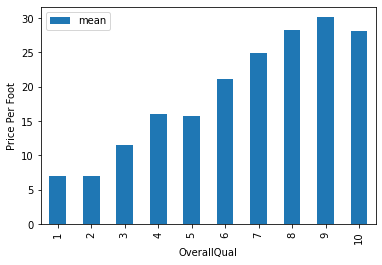

In [54]:
'''

as the Overall quality of the house increases the price per foot increases

'''
df.groupby('OverallQual')['PricePerFoot'].agg(['mean']).plot(kind='bar')
plt.ylabel('Price Per Foot')

Text(0, 0.5, 'Price Per Foot')

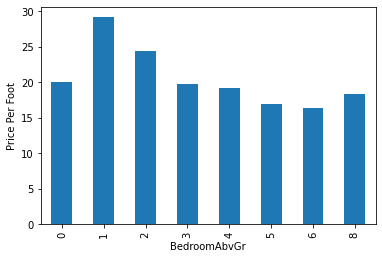

In [53]:
'''
the less you have bedroom the price per feet is higher

'''
df.groupby('BedroomAbvGr')['PricePerFoot'].agg('mean').plot(kind='bar')
plt.ylabel('Price Per Foot')

Text(0, 0.5, 'Price Per Foot')

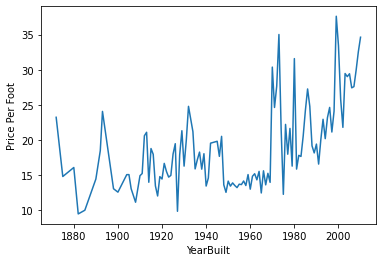

In [52]:
'''
In general there a up and down trend
we can see at each crisis the price decrease(WW1,great depression,WW2,financial crisis 2008)

'''

df.groupby('YearBuilt')['PricePerFoot'].agg('mean').plot(kind='line')
plt.ylabel('Price Per Foot')

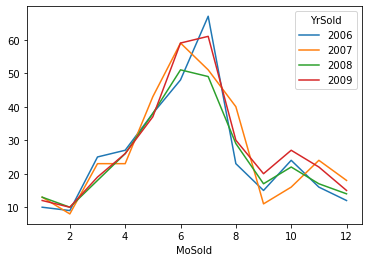

In [40]:
'''

Number of Sale acros Years,
we can see there's a trend in the Sale per month and per year

'''

df.groupby(['YrSold','MoSold'])['SalePrice'].agg('count').iloc[:12*4].unstack(0).plot(kind='line')

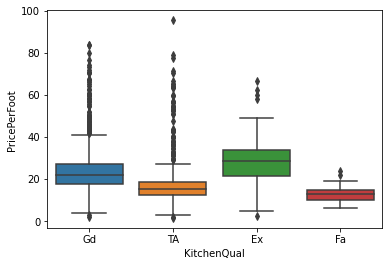

In [43]:
'''Logically, Excellent Kitchen quality rasies the Price per Foot'''
sns.boxplot(x = 'KitchenQual', y = 'PricePerFoot', data = df) 

Text(0, 0.5, 'Sale Price')

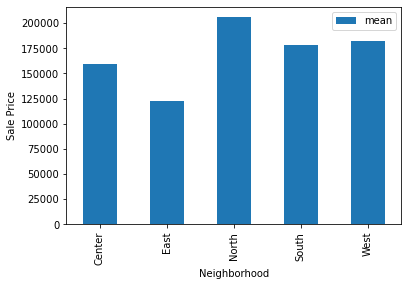

In [51]:
''' Northern part of town has the most expensive houses on average.'''

df.groupby('Neighborhood')['SalePrice'].agg(['mean']).plot(kind='bar')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

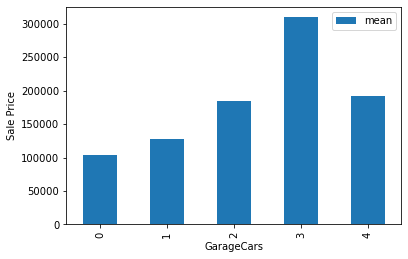

In [58]:
''' There is a trend that salprice of the house goes up as number of cars that fit in the garage increase. 
Interesting to see why it drastically goes down for 4. Likely due to lack of houses with 4-car garages.'''
df.groupby('GarageCars')['SalePrice'].agg(['mean']).plot(kind='bar')
plt.ylabel('Sale Price')